In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [62]:
X = df.drop('sales', axis = 1)
y = df['sales']

### Polynomial Regression

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
poly_converter = PolynomialFeatures(degree = 2, include_bias= False)

In [65]:
# poly_converter.fit(X)

In [66]:
# poly_converter.transform(X)

In [67]:
poly_features = poly_converter.fit_transform(X)

In [68]:
X.shape

(200, 3)

In [69]:
poly_features.shape

(200, 9)

In [70]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [71]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [72]:
X.iloc[0]**2

TV           52946.01
radio         1428.84
newspaper     4788.64
Name: 0, dtype: float64

In [73]:
230.1*37.8

8697.779999999999

In [74]:
230.1 * 69.2

15922.92

### Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size= 0.25, random_state= 50)

### Model for fitting on Polynomial Data

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
model = LinearRegression()

In [78]:
model.fit(X_train, y_train)

LinearRegression()

### Evaluation on Test Set

In [79]:
test_prediction = model.predict(X_test)

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, test_prediction)
MSE = mean_squared_error(y_test, test_prediction)
RMSE = np.sqrt(MSE)

In [81]:
MAE

0.4198184562623396

In [82]:
MSE

0.26164024745566844

In [83]:
RMSE

0.5115078175899841

In [84]:
df['sales'].mean()

14.0225

In [85]:
45/14  #error of 3%

3.2142857142857144

### Choosing a Model

#### Adjusting Parameters 

In [87]:
# training error per degree

train_rmse_errors = []

# test error per degree

test_rmse_errors = []

for d in range (1,30):

    #create polyset for degree 'd'
    polynomial_converter = PolynomialFeatures(degree =d, include_bias= False)
    polynomial_features = polynomial_converter.fit_transform(X)

    #split my new poly dataset

    X_train, X_test, y_train, y_test = train_test_split(polynomial_features,y,test_size= 0.25, random_state=50)

    #train on my new polyset 
    mod = LinearRegression()
    mod.fit(X_train, y_train)

    #predict on both train and test set
    train_pred = mod.predict(X_train)
    test_pred = mod.predict(X_test)

    #Errors on train & test set
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    #append errors to list for plotting 
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [88]:
train_rmse_errors

[1.7423907124229019,
 0.6395144182615881,
 0.4938020413274565,
 0.3742055388169779,
 0.26627451468285707,
 0.2366580629110782,
 8.315773389623512,
 0.22736830983678366,
 0.30787926683907824,
 0.34058761843362306,
 0.33220390093158586,
 0.4608660219303582,
 0.5912417365739776,
 0.7921336696978647,
 0.8339331548664873,
 1.103108266059489,
 1.2288908777312295,
 1.4201555227332625,
 12.740385059165916,
 2.461341072636836,
 3.488728306452919,
 6.295682306856956,
 3.0299801703481477,
 2.0927311643410973,
 2.404363934860939,
 4.999694117778096,
 4.649840714629103,
 6.284649349639108,
 5.955210045784107]

In [89]:
test_rmse_errors

[1.4560791402121016,
 0.5115078175899841,
 0.37347079169546793,
 0.5399751811968482,
 2.1618154774869236,
 14.83600105959763,
 753.135552441381,
 1169.009898836799,
 30841.07361801692,
 40854.85033454927,
 192405.61221216148,
 263189.92883084394,
 993010.4263235074,
 597458.7926929367,
 379433.5513305163,
 729322.8748991896,
 165680.99757313065,
 1616803.9558002925,
 1218250.8004943116,
 726817.145981991,
 2174773.9759083996,
 549441.8977776769,
 1101329.944726079,
 315518.3229779769,
 784770.5126010705,
 758320.018909749,
 426909.31512765493,
 553229.2894233346,
 317505.7526236235]

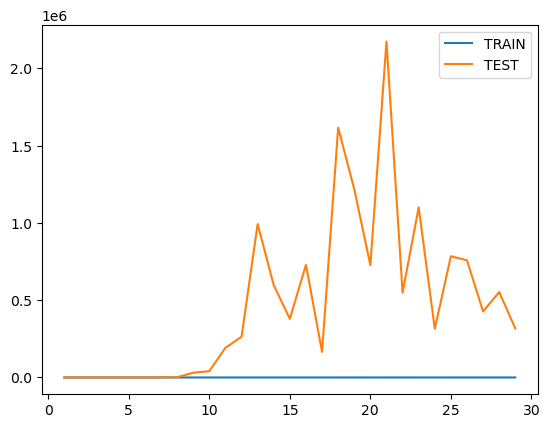

In [93]:
plt.plot(range(1,30), train_rmse_errors, label ='TRAIN')
plt.plot(range(1,30), test_rmse_errors, label = 'TEST')
plt.legend()

#not getting a clear idea

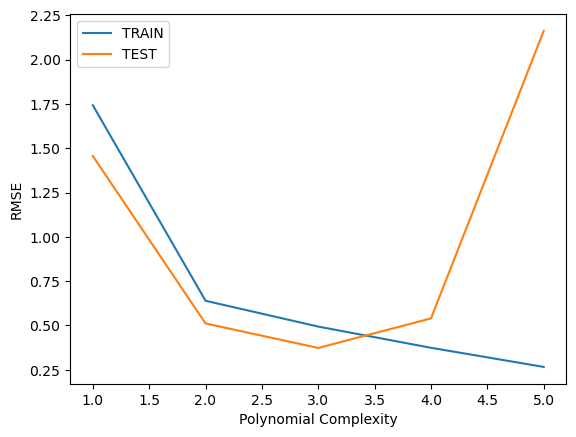

In [96]:
plt.plot(range(1,6), train_rmse_errors[:5], label ='TRAIN')
plt.plot(range(1,6), test_rmse_errors[:5], label = 'TEST')
plt.xlabel('Polynomial Complexity')
plt.ylabel('RMSE')
plt.legend()

In [97]:
# From looking at the plot the degree which can be selected can be - 3 or 4

#### Finalizing Model Choice

In [98]:
final_poly_converter = PolynomialFeatures(degree =3, include_bias= False)

In [102]:
final_poly_features = final_poly_converter.fit_transform(X)

In [103]:
final_poly_converter.fit_transform(X)[0].shape

(19,)

In [104]:
final_model = LinearRegression()

In [105]:
final_model.fit(final_poly_features, y)

LinearRegression()

### Save Model and Converter 

In [106]:
from joblib import dump, load

In [107]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [108]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

### Deployment & Predictions

In [109]:
loaded_poly = load ('poly_converter.joblib')
loaded_model = load('final_poly_model.joblib')

In [111]:
campaign = [[149,23,12],[149,23,12000]]
campaign_poly = loaded_poly.transform(campaign)

C:\Users\heros\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [112]:
campaign_poly

array([[1.490000e+02, 2.300000e+01, 1.200000e+01, 2.220100e+04,
        3.427000e+03, 1.788000e+03, 5.290000e+02, 2.760000e+02,
        1.440000e+02, 3.307949e+06, 5.106230e+05, 2.664120e+05,
        7.882100e+04, 4.112400e+04, 2.145600e+04, 1.216700e+04,
        6.348000e+03, 3.312000e+03, 1.728000e+03],
       [1.490000e+02, 2.300000e+01, 1.200000e+04, 2.220100e+04,
        3.427000e+03, 1.788000e+06, 5.290000e+02, 2.760000e+05,
        1.440000e+08, 3.307949e+06, 5.106230e+05, 2.664120e+08,
        7.882100e+04, 4.112400e+07, 2.145600e+10, 1.216700e+04,
        6.348000e+06, 3.312000e+09, 1.728000e+12]])

In [113]:
loaded_model.predict(campaign_poly)

array([ 1.48505033e+01, -3.94381405e+06])